<a href="https://colab.research.google.com/github/Bryan0122/PRI/blob/master/PRI_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#https://drive.google.com/file/d/1_7TT83TiGF1Dnr--2iAfJqNj_Q3se_AL/view?usp=sharing
#https://drive.google.com/open?id=1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH
#id del archivo: 1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH
FILEID = "1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O codigos.zip && rm -rf /tmp/cookies.txt
!unzip codigos.zip
!dir
!pip install mne==0.19

--2020-04-24 16:07:38--  https://docs.google.com/uc?export=download&confirm=&id=1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH
Resolving docs.google.com (docs.google.com)... 74.125.141.113, 74.125.141.102, 74.125.141.101, ...
Connecting to docs.google.com (docs.google.com)|74.125.141.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-74-docs.googleusercontent.com/docs/securesc/scii64sjp5jiu25sbtdkgfb4037oafe1/7i8usm4ie8op2f6c1r46j4lk30o3p8n9/1587744450000/11146100322577758036/14843818979268271163Z/1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH?e=download [following]
--2020-04-24 16:07:38--  https://doc-00-74-docs.googleusercontent.com/docs/securesc/scii64sjp5jiu25sbtdkgfb4037oafe1/7i8usm4ie8op2f6c1r46j4lk30o3p8n9/1587744450000/11146100322577758036/14843818979268271163Z/1Swni4KqUe9gu3enPqBQUH4aYl0PRxzDH?e=download
Resolving doc-00-74-docs.googleusercontent.com (doc-00-74-docs.googleusercontent.com)... 173.194.216.132, 2607:f8b0:400c:c0d::84
Connecting to

**Añadir carpeta**

In [0]:
import os
import sys
Path='/content/PRI'
sys.path.append(Path)
DB = os.path.join(Path, 'DB')

**Cargar librerias**

In [0]:
import cv2
import time
import numpy as np
import math as math
import scipy.io as sio
from sklearn import datasets
import matplotlib.pyplot as plt
from scipy.spatial import distance
from scipy.spatial.distance import cdist
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics.cluster import adjusted_rand_score
from main_functions import PRI,MiniBatchPRI,spectralClustering,Lconvert
from sklearn.base import BaseEstimator, TransformerMixin, ClusterMixin


**Cargar Bases de datos**

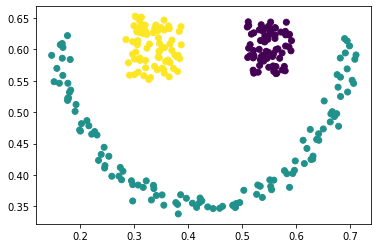

In [0]:
data = sio.loadmat(DB)['DB'][0, 0]
happy = data['happy']
sc = SpectralClustering(n_clusters=3, n_neighbors=5, gamma = 1000)
sc.fit(happy)
labels_happy = sc.labels_
plt.scatter(happy[:,0],happy[:,1],c=labels_happy)

**Parte 1**

**Punto Fijo**

el tiempo requerido fue:2.2261791229248047sg
Ari: 0.39811041152236226 y accuracy: 0.7368421052631579


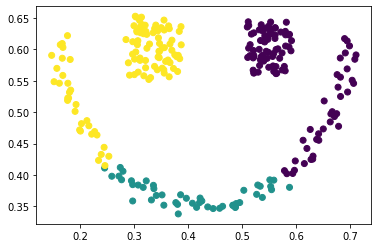

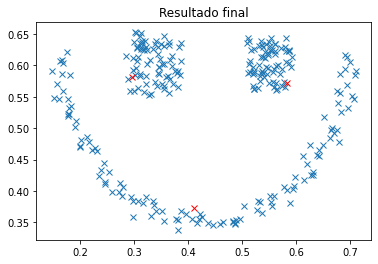

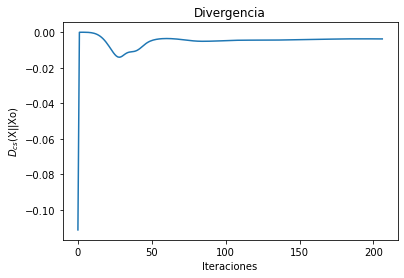

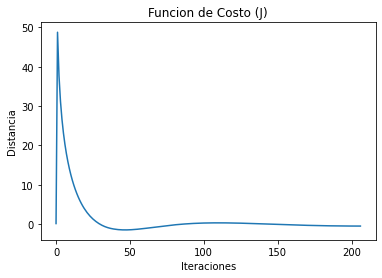

In [0]:
t = time.time()
p = PRI(n_groups=3, lambda_=15, sigma_initial=40, method='FP',
                 reduction_ = True)
p.fit(happy,labels_happy)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
labels_pre_FP=p.predict(happy,labels_happy)
Rari_Fp=adjusted_rand_score(labels_happy,labels_pre_FP)
Racc_Fp=accuracy_score(labels_happy,labels_pre_FP)
print('Ari: '+str(Rari_Fp)+' y'+' accuracy: '+str(Racc_Fp))
p.results()


**SGD**

el tiempo requerido fue:2.2943310737609863sg
Ari: 0.40143028664916547 y accuracy: 0.7368421052631579


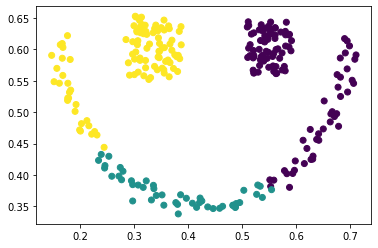

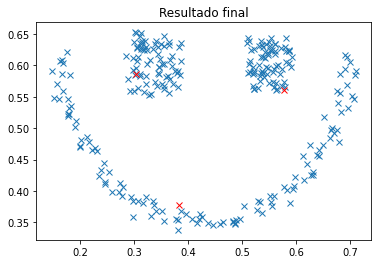

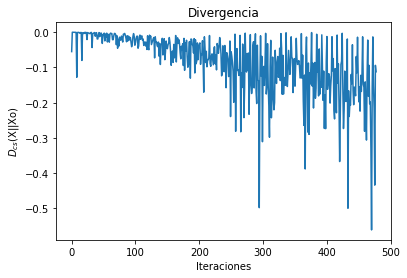

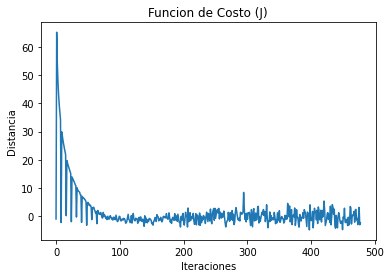

In [0]:
t = time.time()
p = MiniBatchPRI(n_groups=3, lambda_=15, sigma_initial=110, method='SGD',
                 reduction_ = True)
p.fit(happy,labels_happy)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
labels_pre_SGD=p.predict(happy,labels_happy)
Rari_SGD=adjusted_rand_score(labels_happy,labels_pre_SGD)
Racc_SGD=accuracy_score(labels_happy,labels_pre_SGD)
print('Ari: '+str(Rari_SGD)+' y'+' accuracy: '+str(Racc_SGD))
p.results()

**Adam**

el tiempo requerido fue:1.957852840423584sg
Ari: 0.39377094790976275 y accuracy: 0.7330827067669173


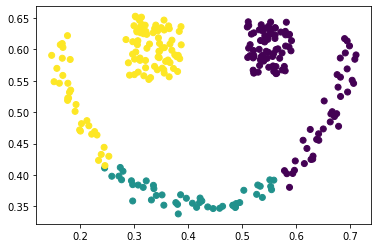

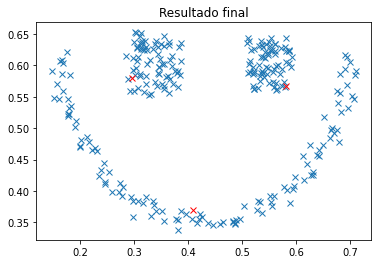

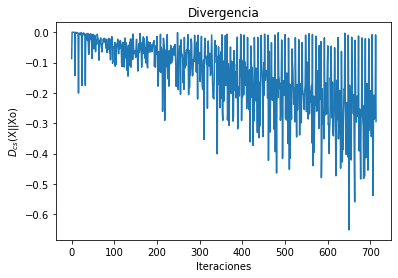

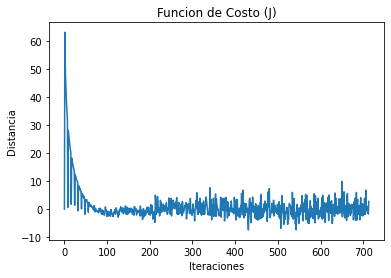

In [0]:
t = time.time()
p = MiniBatchPRI(n_groups=3, lambda_=15, sigma_initial=100, method='SGD',optimization='Adam',
                 reduction_ = True)
p.fit(happy,labels_happy)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
labels_pre_SGDA=p.predict(happy,labels_happy)
Rari_SGDA=adjusted_rand_score(labels_happy,labels_pre_SGDA)
Racc_SGDA=accuracy_score(labels_happy,labels_pre_SGDA)
print('Ari: '+str(Rari_SGDA)+' y'+' accuracy: '+str(Racc_SGDA))
p.results()

**Nadam**

el tiempo requerido fue:1.2185323238372803sg
Ari: 0.3932325300473249 y accuracy: 0.7330827067669173


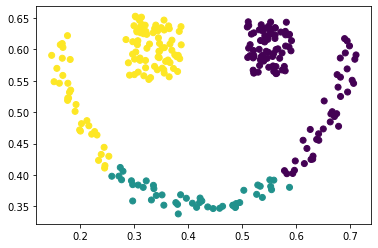

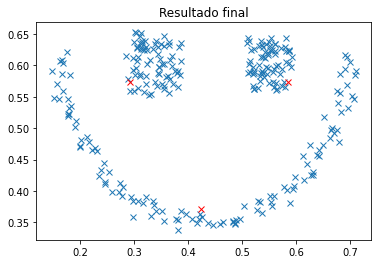

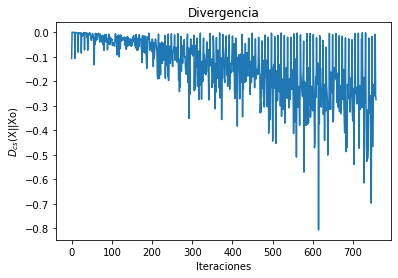

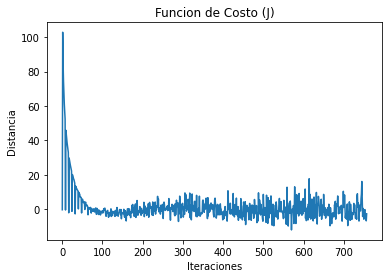

In [0]:
t = time.time()
p = MiniBatchPRI(n_groups=3, lambda_=25, sigma_initial=100, method='SGD',optimization='Nadam',
                 reduction_ = True)
p.fit(happy,labels_happy)
print('el tiempo requerido fue:'+ str(time.time() - t)+'sg')
labels_pre_SGDN=p.predict(happy,labels_happy)
Rari_SGDN=adjusted_rand_score(labels_happy,labels_pre_SGDN)
Racc_SGDN=accuracy_score(labels_happy,labels_pre_SGDN)
print('Ari: '+str(Rari_SGDN)+' y'+' accuracy: '+str(Racc_SGDN))
p.results()

**KNN**

In [0]:
knn_happy=KMeans(n_clusters=3)
knn_happy.fit(happy)
labels_pre_KNN=knn_happy.labels_
labels_pre_KNN=Lconvert().fit(labels_pre_KNN,labels_happy)
Rari_KNN=adjusted_rand_score(labels_happy,labels_pre_KNN)
Racc_KNN=accuracy_score(labels_happy,labels_pre_KNN)
print('Ari: '+str(Rari_KNN)+' y'+' accuracy: '+str(Racc_KNN))


Ari: 0.4022130084121129 y accuracy: 0.7406015037593985


(0.11896678550925124,
 0.7385885706915943,
 0.32241855402955133,
 0.6681544114995808)

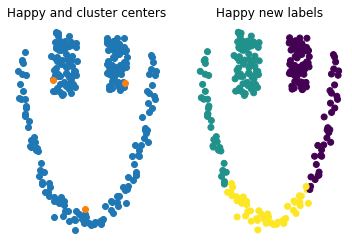

In [0]:
plt.subplot(121)
plt.scatter(happy[:,0],happy[:,1])
plt.scatter(knn_happy.cluster_centers_[:,0],knn_happy.cluster_centers_[:,1])
plt.title('Happy and cluster centers')
plt.axis('off')
plt.subplot(122)
plt.scatter(happy[:,0],happy[:,1],c=knn_happy.labels_)
plt.title('Happy new labels')
plt.axis('off')

**Spectral CLustering**

In [0]:
sc_happy=SpectralClustering(gamma=1000,n_clusters=3,n_neighbors=2)
sc_happy.fit(happy)
labels_pre_sc=sc_happy.labels_
labels_pre_sc=Lconvert().fit(labels_pre_sc,labels_happy)
Rari_sc=adjusted_rand_score(labels_happy,labels_pre_sc)
Racc_sc=accuracy_score(labels_happy,labels_pre_sc)
print('Ari: '+str(Rari_sc)+' y'+' accuracy: '+str(Racc_sc))


Ari: 1.0 y accuracy: 1.0


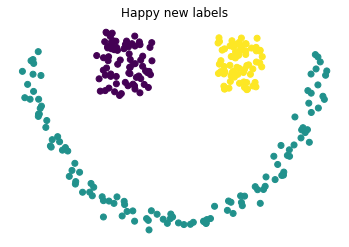

In [0]:
ax2=plt.subplot()
ax2=plt.scatter(happy[:,0],happy[:,1],c=sc_happy.labels_)
ax2=plt.title('Happy new labels')
ax2=plt.axis('off')

**Parte 2**

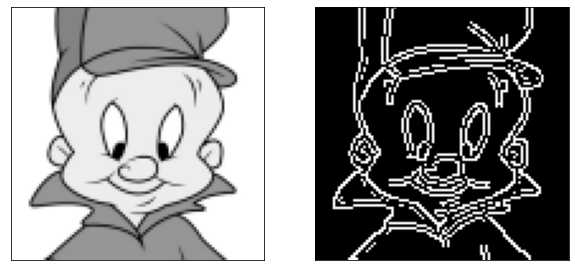

In [4]:
img = cv2.imread('/content/PRI/image.PNG', 0)
edges = cv2.Canny(img, 100, 255)
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(122)
plt.imshow(edges, cmap = 'gray')
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [0]:
indices = np.where(edges != [0])
coordinates = zip(indices[0], indices[1])
indices=np.asarray(indices).T

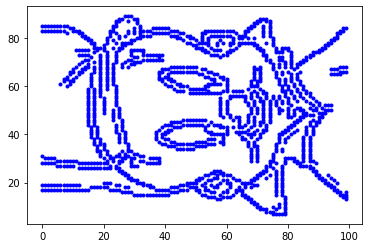

In [6]:
plt.plot(indices[:,0],indices[:,1],'b.')

/content/PRI/main_functions.py:196: RuntimeWarning: divide by zero encountered in log
  A = -np.log((1 / N * No) * K1)


el tiempo requerido fue:243.19598150253296sg


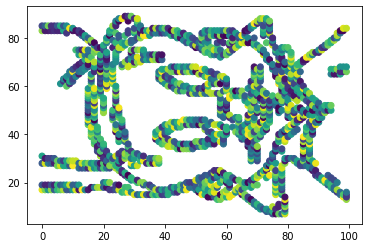

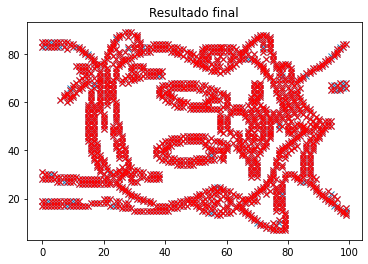

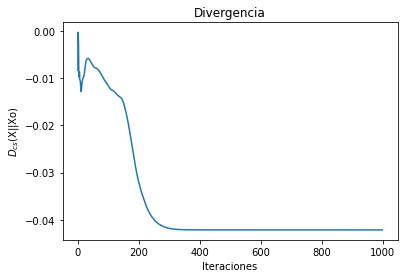

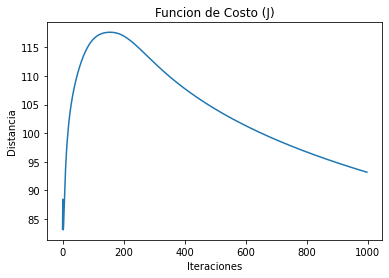

In [8]:
t = time.time()
p = PRI(n_groups=3, lambda_=15, sigma_initial=2, method='FP',
        reduction_ = False, PC=500)
p.fit(indices)
print('el tiempo requerido fue:' + str(time.time() - t) + 'sg')
p.results()

**Guardar resultados**

In [0]:

import shutil
from joblib import dump, load
from datetime import date, datetime
save={'i':indices}
dump(save,'/content/PRI/DB2.joblib')
namefile = str(datetime.now().strftime("%Y_%m_%d_%H_%M_%d"))+'indices'
shutil.make_archive(namefile, 'zip', '/content/PRI')
files.download(namefile+'.zip')